<a href="https://colab.research.google.com/github/enn-dee/Breast_cancer_ml/blob/main/breast_cancer_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle shap --quiet


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"x0enndee","key":"bf165ca6eea5899af16d608d71e2774b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip -d data
!ls data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 17.9MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data/data.csv           
data.csv


In [ ]:
# load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# clean
df.info()
df.isna().sum()
df.describe()

# Drop irrelevant columns
df = df.drop(columns=['id'], errors='ignore')
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

# Encode diagnosis (M=1, B=0)
df['target'] = (df['diagnosis'] == 'M').astype(int)
df.drop(columns=['diagnosis'], inplace=True)

df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 31)

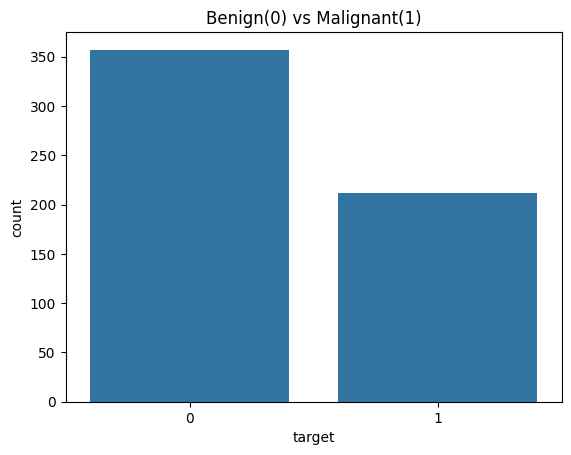

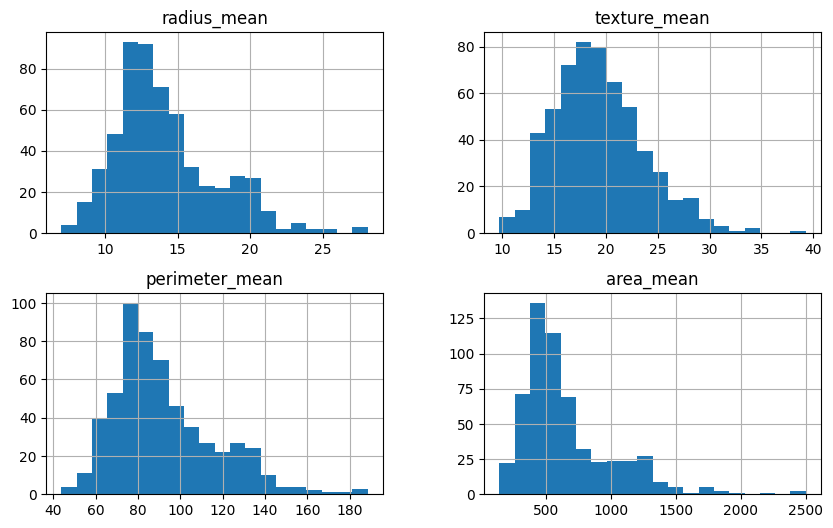

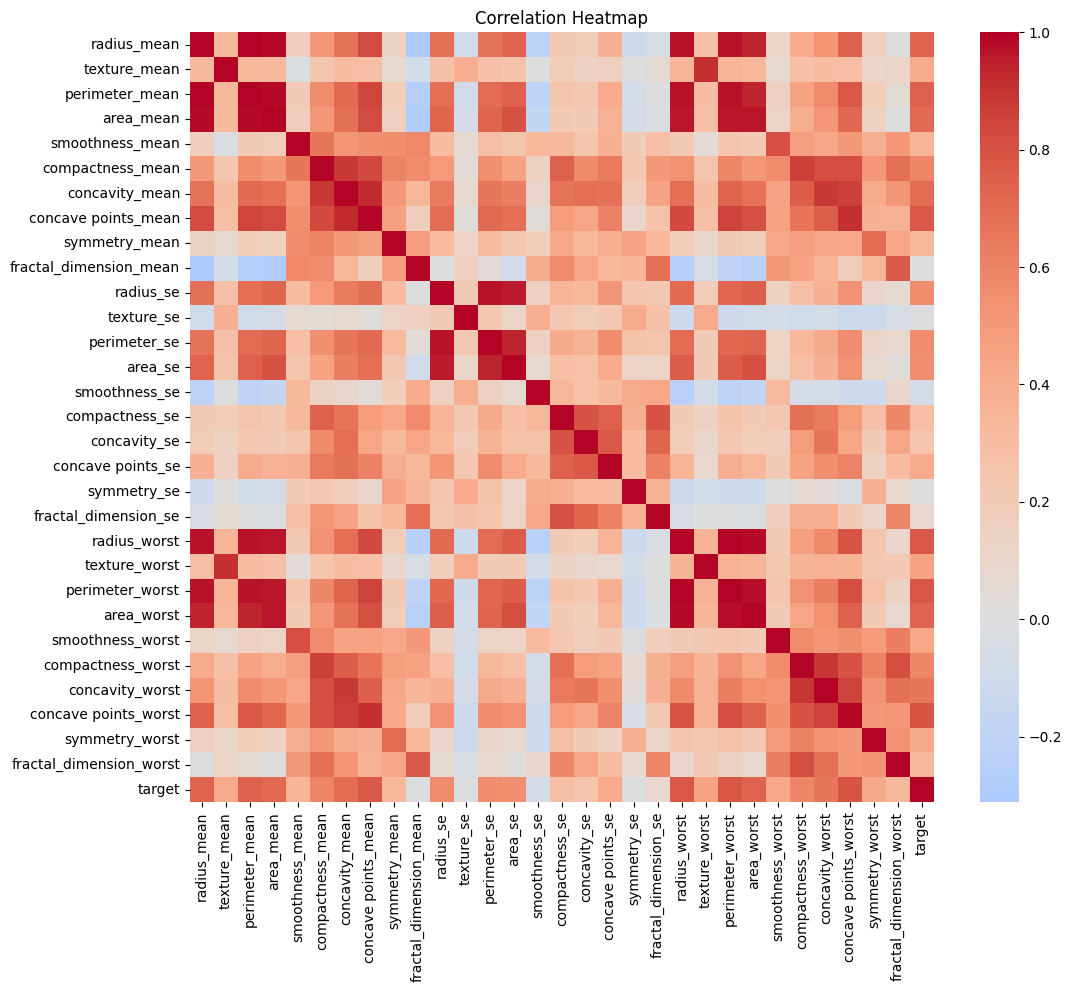

In [ ]:
# Class balance
sns.countplot(x='target', data=df)
plt.title("Benign(0) vs Malignant(1)")
plt.show()

# Histograms
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
df[features].hist(bins=20, figsize=(10,6))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression(max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
svm = SVC(probability=True, random_state=42)

lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)     # tree model doesn’t need scaling
svm.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

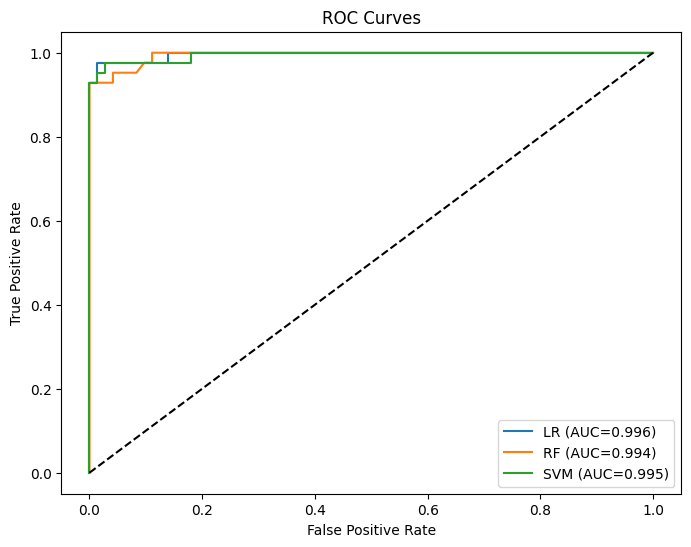

{'LR': {'accuracy': 0.9649122807017544,
  'roc_auc': np.float64(0.996031746031746),
  'confusion_matrix': array([[71,  1],
         [ 3, 39]])},
 'RF': {'accuracy': 0.9649122807017544,
  'roc_auc': np.float64(0.994212962962963),
  'confusion_matrix': array([[72,  0],
         [ 4, 38]])},
 'SVM': {'accuracy': 0.9736842105263158,
  'roc_auc': np.float64(0.9947089947089947),
  'confusion_matrix': array([[72,  0],
         [ 3, 39]])}}

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

models = {'LR': lr, 'RF': rf, 'SVM': svm}
results = {}

plt.figure(figsize=(8,6))

for name, model in models.items():
    if name == 'RF':
        X_t = X_test
    else:
        X_t = X_test_scaled

    y_pred = model.predict(X_t)
    y_prob = model.predict_proba(X_t)[:,1]

    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

    results[name] = {
        "accuracy": acc,
        "roc_auc": auc_score,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves")
plt.show()

results


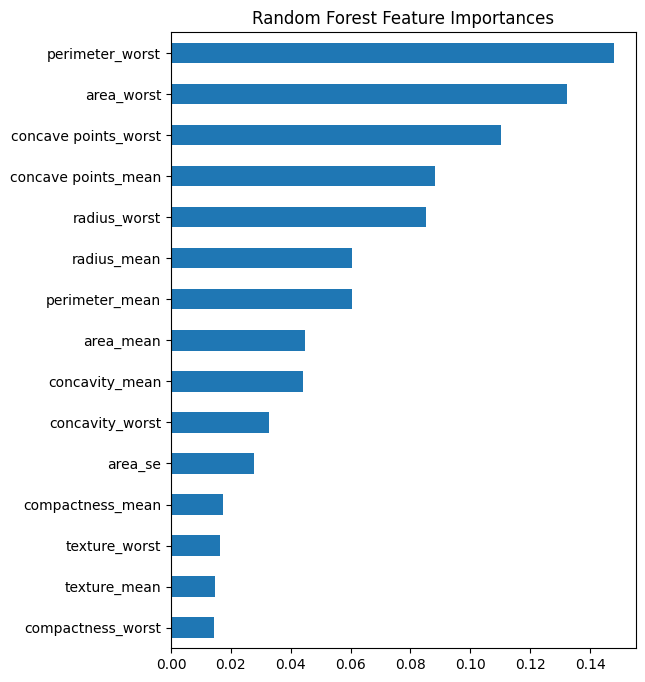

In [ ]:
# Random forest importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(15).plot.barh(figsize=(6,8))
plt.title("Random Forest Feature Importances")
plt.show()


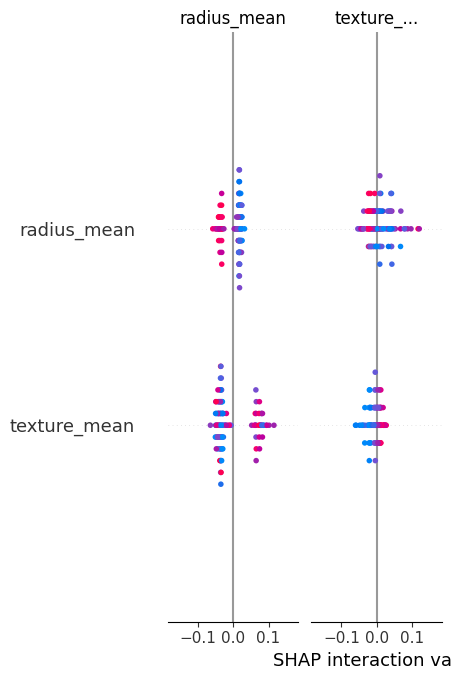

In [ ]:
# SHAP values
import shap
explainer = shap.Explainer(rf)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


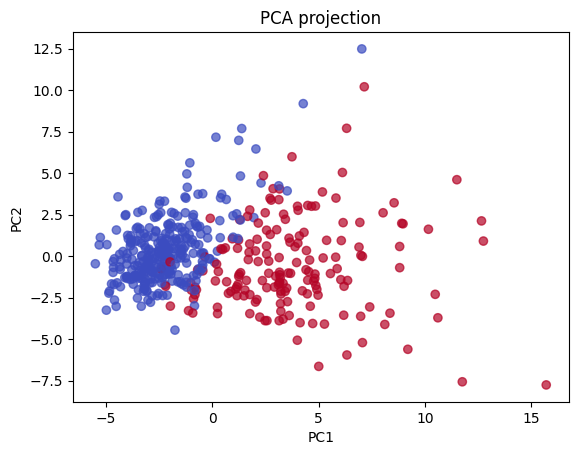

In [ ]:
# Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA projection')
plt.show()


In [ ]:
import pandas as pd
results_df = pd.DataFrame(results).T
results_df


,accuracy,roc_auc,confusion_matrix
LR,0.964912,0.996032,"[[71, 1], [3, 39]]"
RF,0.964912,0.994213,"[[72, 0], [4, 38]]"
SVM,0.973684,0.994709,"[[72, 0], [3, 39]]"
